# SISU Digital Humanities: Textual and Language Analysis on Social Media<br />
### Distant Reading using NLTK and Pandas
Created by Tom van Nuenen (tom.van_nuenen@kcl.ac.uk) <br />


# Distant Reading

This optional notebook focuses on some basics to Pandas, as well as some methods to engage in a simple distant reading using NLTK. By the end of this notebook, you will:

* Know how to open and perform simple operations on a DataFrame;
* Use NLTK's `Text()` object to perform some basic distant reading operations on a subreddit.

Please note that the example dataset used here comes from the MOOC Intercultural Communication (https://centerforinterculturaldialogue.org/2021/03/17/mooc-intercultural-communication-2021-china/). For copyright reasons I cannot share the whole dataset with you.

## Importing packages

Let's start by importing some packages:

In [53]:
import nltk

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.book import FreqDist
from nltk.text import Text
import pandas as pd
from datetime import datetime
import collections
import string

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pandas basics & Working with Reddit data

Using the `.head()` method we can get the first n rows of a df. The default is 5. We can add a *parameter* (here 3) to indicate how many rows we want to print.

In [4]:
df = pd.read_csv("data/icc3-comments.csv") 

In [7]:
df.head(5)

,id,author_id,parent_id,step,week_number,step_number,text,timestamp,likes,first_reported_at,first_reported_reason,moderation_state,moderated
0,16363017,2b065715-ca93-45a1-b129-fb015822bdde,NaN,1.1,1,1,Welcome to this run of our course! Here at the...,2016-10-10 00:21:15 UTC,15,NaN,NaN,NaN,NaN
1,16363067,2b065715-ca93-45a1-b129-fb015822bdde,NaN,1.2,1,2,Our Educator and Mentor team is eager to know ...,2016-10-10 00:26:08 UTC,1,NaN,NaN,NaN,NaN
2,16363229,d0adfa81-69cd-4a49-92f3-4a8092983376,NaN,1.1,1,1,"Hello, Professor Kulich. Happy and excited to ...",2016-10-10 00:46:01 UTC,1,NaN,NaN,NaN,NaN
3,16363369,d0adfa81-69cd-4a49-92f3-4a8092983376,NaN,1.1,1,1,Hello everyone. Good morning.This is the first...,2016-10-10 01:01:07 UTC,0,NaN,NaN,NaN,NaN
4,16363370,19cb3801-93be-4268-9b62-b012517b85ba,NaN,1.5,1,5,Well I'm a Chinese so I presume the most impor...,2016-10-10 01:01:19 UTC,4,NaN,NaN,NaN,NaN


Here's what we're seeing. Pay special attention to the "NaN" labels, indicating missing values. 

This particular dataset includes the comments on the MOOC under the "text" column, which is what we're most interested in.

other columns contain valuable metadata you can use in your analyses, such as the "likes" column (i.e., the amount of likes a post has received), the "timestamp" column which indicates when the post was written, and the "step" column which refers to pedagogically organised "Learning Steps" focusing on particular activities.

### Sorting a DF
Using the `.sort_values()` method we can sort the df by particular columms. We use two parameters: the `by` parameter indicates by which column we want to sort, the `ascending` parameter indicated whether our sortation is in ascending or descending order.

Here, I'm assigning my sorted DataFrame to the same variable `df`, effectively overwriting the old version. These are the top 10 comments based on the amount of "likes" they have received!

In [12]:
df = df.sort_values(by=['likes'], ascending=False)
df.head(10)

,id,author_id,parent_id,step,week_number,step_number,text,timestamp,likes,first_reported_at,first_reported_reason,moderation_state,moderated
0,16363017,2b065715-ca93-45a1-b129-fb015822bdde,NaN,1.10,1,1,Welcome to this run of our course! Here at the...,2016-10-10 00:21:15 UTC,15,NaN,NaN,NaN,NaN
5431,16714165,9adec9b7-86e1-4b7c-a7e7-9175535f7cca,NaN,2.40,2,4,I was sharing my impressions of Switzerland wi...,2016-10-17 22:35:43 UTC,14,NaN,NaN,NaN,NaN
931,16428852,673b5fc3-5817-4b86-8601-99fcc0067d07,NaN,1.80,1,8,I have almost always felt out of the water. Bu...,2016-10-11 14:15:59 UTC,14,NaN,NaN,NaN,NaN
489,16392733,748dc127-86a2-4f60-9579-095f0b478741,NaN,1.70,1,7,Interesting that intercultural communication c...,2016-10-10 16:21:01 UTC,13,NaN,NaN,NaN,NaN
6495,16797181,a33b706a-2391-4d09-93d0-3314dc8ec373,16797174.0,2.80,2,8,"And when that’s clear, the answers are\r\nobvi...",2016-10-19 12:01:12 UTC,13,NaN,NaN,NaN,NaN
14400,17611685,370696ae-ec6a-4cef-973a-2ef2ccc7b94c,NaN,5.10,5,10,Yup. I mentioned it in earlier lessons of week...,2016-11-09 02:11:04 UTC,12,NaN,NaN,NaN,NaN
2018,16518342,9e95bade-da24-4345-bb0b-f32039453066,NaN,1.11,1,11,Only this morning I spoke to a man who called ...,2016-10-13 19:31:36 UTC,12,NaN,NaN,NaN,NaN
14739,17663630,29d4c255-0586-43a0-8e8b-55bafb91c55e,NaN,5.20,5,2,culture shock???\r\n\r\nBeing the only black f...,2016-11-10 16:17:14 UTC,11,NaN,NaN,NaN,NaN
1887,16508171,cd86d426-d2d3-4284-a8a6-3a2e5a1e35da,NaN,2.60,2,6,MINE and OTHER could be illustrated by a simpl...,2016-10-13 13:47:56 UTC,11,NaN,NaN,NaN,NaN
4740,16623617,8645066d-e776-4aff-84f6-c6000fb220e7,NaN,1.12,1,12,"More than anything, in this particular case ev...",2016-10-17 03:51:27 UTC,11,NaN,NaN,NaN,NaN


### Selecting a column
To select a single column of data, simply put the name of the column in between brackets. Let’s select the 'selftext' column. We can print out the first entry in this column as follows:

In [18]:
df['text'][0]

"Welcome to this run of our course! Here at the start you are joining a learner community of more than 4000, so we hope you'll enjoy the varied perspectives, comments, experiences, and stories of our diverse learners! I'm certainly eager to learn with you!!"

As you see, using the `[]` operator selects a set of rows and/or columns from a DataFrame.

Your turn! Use slicing to retrieve the first 10 "selftext" entries in our DataFrame.

In [19]:
# Your code here

df['text'][:10]



0        Welcome to this run of our course! Here at the...
5431     I was sharing my impressions of Switzerland wi...
931      I have almost always felt out of the water. Bu...
489      Interesting that intercultural communication c...
6495     And when that’s clear, the answers are\r\nobvi...
14400    Yup. I mentioned it in earlier lessons of week...
2018     Only this morning I spoke to a man who called ...
14739    culture shock???\r\n\r\nBeing the only black f...
1887     MINE and OTHER could be illustrated by a simpl...
4740     More than anything, in this particular case ev...
Name: text, dtype: object

One thing we often do when we’re exploring a dataset is filtering the data based on a given condition. For example, we might need to find all the rows in our dataset that have received more than 10 "likes". We can use the `.loc[]` method to do so.

In [23]:
df.loc[df.likes >= 10]

,id,author_id,parent_id,step,week_number,step_number,text,timestamp,likes,first_reported_at,first_reported_reason,moderation_state,moderated,datetime
0,16363017,2b065715-ca93-45a1-b129-fb015822bdde,NaN,1.10,1,1,Welcome to this run of our course! Here at the...,2016-10-10 00:21:15 UTC,15,NaN,NaN,NaN,NaN,2016-10-10 00:21:15+00:00
5431,16714165,9adec9b7-86e1-4b7c-a7e7-9175535f7cca,NaN,2.40,2,4,I was sharing my impressions of Switzerland wi...,2016-10-17 22:35:43 UTC,14,NaN,NaN,NaN,NaN,2016-10-17 22:35:43+00:00
931,16428852,673b5fc3-5817-4b86-8601-99fcc0067d07,NaN,1.80,1,8,I have almost always felt out of the water. Bu...,2016-10-11 14:15:59 UTC,14,NaN,NaN,NaN,NaN,2016-10-11 14:15:59+00:00
489,16392733,748dc127-86a2-4f60-9579-095f0b478741,NaN,1.70,1,7,Interesting that intercultural communication c...,2016-10-10 16:21:01 UTC,13,NaN,NaN,NaN,NaN,2016-10-10 16:21:01+00:00
6495,16797181,a33b706a-2391-4d09-93d0-3314dc8ec373,16797174.0,2.80,2,8,"And when that’s clear, the answers are\r\nobvi...",2016-10-19 12:01:12 UTC,13,NaN,NaN,NaN,NaN,2016-10-19 12:01:12+00:00
14400,17611685,370696ae-ec6a-4cef-973a-2ef2ccc7b94c,NaN,5.10,5,10,Yup. I mentioned it in earlier lessons of week...,2016-11-09 02:11:04 UTC,12,NaN,NaN,NaN,NaN,2016-11-09 02:11:04+00:00
2018,16518342,9e95bade-da24-4345-bb0b-f32039453066,NaN,1.11,1,11,Only this morning I spoke to a man who called ...,2016-10-13 19:31:36 UTC,12,NaN,NaN,NaN,NaN,2016-10-13 19:31:36+00:00
14739,17663630,29d4c255-0586-43a0-8e8b-55bafb91c55e,NaN,5.20,5,2,culture shock???\r\n\r\nBeing the only black f...,2016-11-10 16:17:14 UTC,11,NaN,NaN,NaN,NaN,2016-11-10 16:17:14+00:00
1887,16508171,cd86d426-d2d3-4284-a8a6-3a2e5a1e35da,NaN,2.60,2,6,MINE and OTHER could be illustrated by a simpl...,2016-10-13 13:47:56 UTC,11,NaN,NaN,NaN,NaN,2016-10-13 13:47:56+00:00
4740,16623617,8645066d-e776-4aff-84f6-c6000fb220e7,NaN,1.12,1,12,"More than anything, in this particular case ev...",2016-10-17 03:51:27 UTC,11,NaN,NaN,NaN,NaN,2016-10-17 03:51:27+00:00


`.loc[]` is a powerful method that can be used for all kinds of research purposes, if you want to filter or prune your dataset based on some condition. For more info, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

Your turn! Use `loc[]` to retrieve only the posts that have over 200 comments.

### Removing rows
Missing values (`NaN`) in a DataFrame can cause a lot of errors. In general, it's a god idea to get rid of those rows whose "selftext" is missing. This works as follows:

In [25]:
print("length of df is now " + str(len(df)))
clean_df = df.dropna(subset=['text'])
print("length of df is now " + str(len(clean_df)))


length of df is now 16438
length of df is now 16438


## Distant reading with NLTK 
Tomorrow, we will look at preprocessing our text in more detail. For now, let's automate most of it using NLTK's `word_tokenize()` method. We've imported this library at the beginning of this notebook.
`word_tokenize()` works like this:


In [ ]:
# Your code here

sed.loc[sed.num_comments >= 200]




In [26]:
word_tokenize("He is a lumberjack and he is okay. He sleeps all night and he works all day.")

['He',
 'is',
 'a',
 'lumberjack',
 'and',
 'he',
 'is',
 'okay',
 '.',
 'He',
 'sleeps',
 'all',
 'night',
 'and',
 'he',
 'works',
 'all',
 'day',
 '.']

Your turn! Let's tokenize our "selftext" column. Here's what you need to do: 
- Create a new list called `sed_tokens`;
- Begin a for-loop that iterates over the "selftext" column of our `sed` DataFrame; 
- `For` each text in that column, tokenize it using `word_tokenize()`; 
- Add these tokenized words to our new `sed_tokens` list using the list `.extend()` method*.
 
*We use `.extend` instead of `.append`. This is because we want one long list, instead of a list of lists. While `append` adds its argument as a single element to the end of a list – meaning the length of the list itself will increase by one – `extend` adds each element to the list, extending the list.

In [28]:
# Your code here

df_tokens = []

for text in df['text']:
    df_tokens.extend(word_tokenize(text))

## The NLTK `Text()` class
Now, let's have a look at our data. NLTK provides a `Text()` class, which is a "wrapper" that allows for inital exploration of texts. It supports counting, concordancing, collocation discovery, etc. 

In [30]:
# Here, we create our NLTK Text object
df_t = Text(df_tokens)

Let's print out the "docstring" of NLTK's `Text()` object, as well as all the things you can do with this object. Have a read through this to see what it allows you to do!

In [31]:
help(Text)

Help on class Text in module nltk.text:

class Text(builtins.object)
 |  Text(tokens, name=None)
 |  
 |  A wrapper around a sequence of simple (string) tokens, which is
 |  intended to support initial exploration of texts (via the
 |  interactive console).  Its methods perform a variety of analyses
 |  on the text's contexts (e.g., counting, concordancing, collocation
 |  discovery), and display the results.  If you wish to write a
 |  program which makes use of these analyses, then you should bypass
 |  the ``Text`` class, and use the appropriate analysis function or
 |  class directly instead.
 |  
 |  A ``Text`` is typically initialized from a given document or
 |  corpus.  E.g.:
 |  
 |  >>> import nltk.corpus
 |  >>> from nltk.text import Text
 |  >>> moby = Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, i)
 |  
 |  __init__(self, tokens, name=None)
 |      Create a Text object.
 |      
 |      :param tokens:

### Word counts
Let's run a few of these functions. How often do people talk about a "problem"? Let's find out using the `.count()` method.

In [37]:
df_t.count('problem')

329

### Concordances 
One of the most basic, but quite helpful, ways to quickly get an overview of the contexts in which a word appears is through a `.concordance()` view. 

In [33]:
df_t.concordance('problem', width=115)

Displaying 25 of 334 matches:
d try to adapt . So I think it is not just a cultural problem in this story culture shock ? ? ? Being the only blac
 new ecosystem as a mixture of races . I had the same problem fitting in as a Third Culture Kid with locals during 
 me and you feel you have to do something to solve my problem , you have failed me , strange as that may seem . Lis
the answer either . Andy has several identities . The problem with lots of societies is that everyone seems to need
ions . Underneath this , however , is the issue ; the problem itself . Underneath that , is the person . She said ,
id , try to reach the person before talking about the problem . Then the emotion will change . This manager is Chin
ustrated at Markus ' lack of enthusiasm . I think the problem partly lies in assumptions that we make based on our 
became the SUBSTITUTE of life and human contact . The problem is that people are not skilled AT ALL when using a de
lability of opportunity and access to educ

### Collocations

A collocation is a sequence of words that often appear together. The `.collocations()` method can find these in our data.

In [61]:
df_t.collocations()


intercultural communication; different cultures; culture shock; Chen
Lin; Mr. Wang; cultural differences; Mr. Wilson; looking forward;
cultural identity; comfort zone; years ago; n't know; low context; Dr.
Johnson; Hong Kong; cultural background; Intercultural communication;
even though; little bit; cultural identities


### Word plotting
Using the `.dispersion_plot()` method we can easily visualize how often some word appears throughout the text. We have to feed it a list with several words in it.

Sorting our df by date allows us to look "through time" to see whether particular words start (dis)appearing in our data.

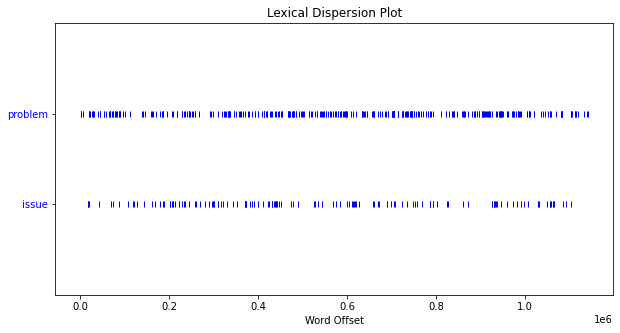

In [34]:
df_t.dispersion_plot(["problem"])

### Similar words
Using the `.similar()` method we can look at "distributional similarity": finding other words which appear in the same contexts as the specified word.
 

In [38]:
df_t.similar('problem')

culture time country situation group person experience language place
way course communication world question family week day people point
city


### Common context
The `.common_contexts()` method allows us to study the common context of two or more words. We must enclose these words in square brackets and round brackets, separated by commas. For instance, when people talk about problems, how often do they mention the word "communication"?

In [48]:
df_t.common_contexts(['problem', 'communication'])

the_is the_. a_. a_with no_, the_with the_, the_was my_. the_in this_,
the_and cultural_in the_itself no_if any_, ``_'' ._is of_that of_.


In [59]:
fdist = FreqDist(df_t)
fdist.most_common(30)

[('.', 50659),
 (',', 44341),
 ('I', 35417),
 ('to', 32796),
 ('the', 32690),
 ('and', 30438),
 ('a', 23096),
 ('of', 20754),
 ('in', 20242),
 ('is', 15364),
 ('that', 11806),
 ('my', 9321),
 ('it', 8883),
 ('with', 8336),
 ('for', 7996),
 ('are', 7382),
 ('you', 7358),
 ('have', 7292),
 ('we', 6812),
 ('be', 6491),
 ('as', 6147),
 ('people', 5943),
 ('from', 5855),
 ('not', 5832),
 ('was', 5812),
 ('am', 5704),
 ('this', 5429),
 ('me', 5169),
 ('but', 4975),
 ('or', 4958)]

We can visualize these numbers.

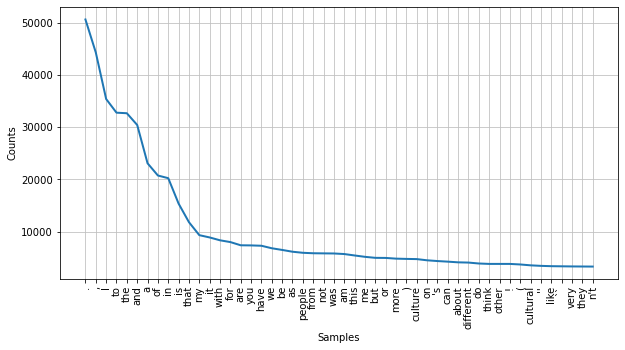

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [76]:
fdist.plot(50, cumulative=False)

Finally, let's have a look at the top-10 words whose length is greater than 6 and whose word frequency is greater than 1500.

In [75]:
sorted(w for w in set(df_t) if len(w)>6 and fdist[w]>1500)[:10]

['because',
 'communication',
 'cultural',
 'culture',
 'cultures',
 'different',
 'important',
 'intercultural',
 'understand']